 # Neo4j and Python Connection
 
 
   ## Sample Data
   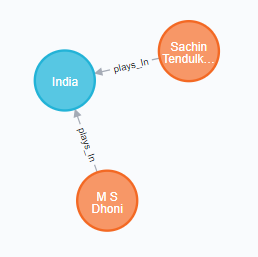

In [1]:
pip install neo4j-driver

Note: you may need to restart the kernel to use updated packages.


In [2]:
from neo4j import GraphDatabase, basic_auth

In [3]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "1234"))

In [4]:
session = driver.session()
result = list(session.run("MATCH (n) RETURN n"))
for record in result:
    print(record)

<Record n=<Node id=0 labels={'player'} properties={'name': 'M S Dhoni'}>>
<Record n=<Node id=39 labels={'player'} properties={'name': 'Sachin Tendulkar'}>>
<Record n=<Node id=40 labels={'team'} properties={'name': 'India'}>>


In [5]:
result = list(session.run("MATCH (n) RETURN n.name"))
print ([record["n.name"] for record in result])

['M S Dhoni', 'Sachin Tendulkar', 'India']


In [6]:
result = list(session.run("MATCH ((n)-[r]->(m)) RETURN n.name,r,m.name"))
#print ([record["n.name"] for record in result])
for record in result:
    print(record)

<Record n.name='Sachin Tendulkar' r=<Relationship id=20 nodes=(<Node id=39 labels=set() properties={}>, <Node id=40 labels=set() properties={}>) type='plays_In' properties={}> m.name='India'>
<Record n.name='M S Dhoni' r=<Relationship id=0 nodes=(<Node id=0 labels=set() properties={}>, <Node id=40 labels=set() properties={}>) type='plays_In' properties={}> m.name='India'>


In [7]:
result = list(session.run("MATCH ((n)-[r]->(m)) RETURN n.name,r,m.name"))
#print ([record["n.name"] for record in result])
for record in result:
    print(record["n.name"],record["r"],record["m.name"])

Sachin Tendulkar <Relationship id=20 nodes=(<Node id=39 labels=set() properties={}>, <Node id=40 labels=set() properties={}>) type='plays_In' properties={}> India
M S Dhoni <Relationship id=0 nodes=(<Node id=0 labels=set() properties={}>, <Node id=40 labels=set() properties={}>) type='plays_In' properties={}> India


In [8]:
result = list(session.run("MATCH ((n)-[r]->(m)) RETURN n.name,type(r),m.name"))
#print ([record["n.name"] for record in result])
for record in result:
    print(record["n.name"],record["type(r)"],record["m.name"])

Sachin Tendulkar plays_In India
M S Dhoni plays_In India
